In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from grab_data import *
from itertools import product

Data Source: Nasdaq - Quandl

In [29]:
root_data_dir = '/Users/zhangke/Desktop/SpreadTrading/data'
table_path = 'QUOTEMEDIA/PRICES'
my_date = 20250121
data_file = os.path.join(root_data_dir, f"{table_path}_{my_date}.zip")
raw_data = pd.read_csv(data_file)

---

## 1. Data Cleaning


In [30]:
raw_data.head()

,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
0,JTKWY,2022-03-11,6.1700,7.3200,5.7900,6.72,9440097.0,0.0,1.0,6.1700,7.3200,5.7900,6.72,9440097.0
1,JTKWY,2022-03-10,6.1600,6.1750,5.9350,6.07,2261623.0,0.0,1.0,6.1600,6.1750,5.9350,6.07,2261623.0
2,FG_1,2020-06-01,8.1000,8.3900,8.1000,8.39,3086317.0,0.0,1.0,8.1000,8.3900,8.1000,8.39,3086317.0
3,YTENQ,2024-09-30,0.9514,1.0500,0.9514,1.05,842.0,0.0,1.0,0.9514,1.0500,0.9514,1.05,842.0
4,FLWS,2022-03-09,14.5700,14.9588,14.4100,14.45,662492.0,0.0,1.0,14.5700,14.9588,14.4100,14.45,662492.0


In [31]:
def filter_data (df, start_date, end_date, ticker):
    new_df = df[(df['date'] >= start_date) & (df["date"] <= end_date) & (df['ticker'] == ticker)]
    new_df = new_df.set_index('date')
    new_df = new_df.sort_index()
    return new_df                                                                     

In [32]:
raw_data['date'] = pd.to_datetime(raw_data['date'])

start = '2022-12-02'
end = '2024-11-15'

# SVOL ETF
svol_df = filter_data(raw_data, start, end, "SVOL")

# ETF pairs: FTXL, SMH
x_df = filter_data(raw_data, start, end, 'FTXL')
y_df = filter_data(raw_data, start, end, 'SMH')

In [33]:
x_df

,ticker,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2022-12-02,FTXL,56.6175,57.0887,56.3600,57.01,4866.0,0.0,1.0,55.749908,56.213888,55.496354,56.136394,4866.0
2022-12-05,FTXL,57.0100,57.0545,56.2121,56.72,3053.0,0.0,1.0,56.136394,56.180212,55.350720,55.850838,3053.0
2022-12-06,FTXL,56.5900,56.5900,55.1101,55.29,17290.0,0.0,1.0,55.722830,55.722830,54.265607,54.442750,17290.0
2022-12-07,FTXL,55.2500,55.4200,55.1400,55.14,2338.0,0.0,1.0,54.403363,54.570758,54.295049,54.295049,2338.0
2022-12-08,FTXL,55.5924,57.0700,55.5924,57.07,9841.0,0.0,1.0,54.740517,56.195474,54.740517,56.195474,9841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11,FTXL,94.1300,94.1300,91.0800,92.18,34133.0,0.0,1.0,93.957321,93.957321,90.912916,92.010898,34133.0
2024-11-12,FTXL,91.8700,91.8700,89.9740,90.93,24589.0,0.0,1.0,91.701467,91.701467,89.808945,90.763191,24589.0
2024-11-13,FTXL,90.0500,90.0500,89.1000,89.10,21219.0,0.0,1.0,89.884806,89.884806,88.936549,88.936549,21219.0


In [34]:
# Calculate daily dollar volume
cols = ['adj_close','volume']
etf_df = pd.merge(x_df[cols],y_df[cols], left_index = True, right_index = True, suffixes = ('_x', '_y'))
etf_df['dollar_volume_x'] = etf_df['adj_close_x'] * etf_df['volume_x']
etf_df['dollar_volume_y'] = etf_df['adj_close_y'] * etf_df['volume_y']
etf_df['dollar_volume_roll_x'] = etf_df['dollar_volume_x'].rolling(window = 15).median()
etf_df['dollar_volume_roll_y'] = etf_df['dollar_volume_y'].rolling(window = 15).median()
etf_df['N_t'] = etf_df[['dollar_volume_roll_x', 'dollar_volume_roll_y']].min(axis = 1)
etf_df

,adj_close_x,volume_x,adj_close_y,volume_y,dollar_volume_x,dollar_volume_y,dollar_volume_roll_x,dollar_volume_roll_y,N_t
date,,,,,,,,,
2022-12-02,56.136394,4866.0,110.004989,4101731.0,2.731597e+05,4.512109e+08,NaN,NaN,NaN
2022-12-05,55.850838,3053.0,108.693066,3521843.0,1.705126e+05,3.827999e+08,NaN,NaN,NaN
2022-12-06,54.442750,17290.0,106.309985,3040611.0,9.413152e+05,3.232473e+08,NaN,NaN,NaN
2022-12-07,54.295049,2338.0,106.285417,2818152.0,1.269418e+05,2.995285e+08,NaN,NaN,NaN
2022-12-08,56.195474,9841.0,108.992794,3615992.0,5.530197e+05,3.941171e+08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-11-11,92.010898,34133.0,253.530000,7647070.0,3.140608e+06,1.938762e+09,1.506048e+06,1.325505e+09,1.506048e+06
2024-11-12,90.763191,24589.0,251.860000,6530718.0,2.231776e+06,1.644827e+09,2.231776e+06,1.325749e+09,2.231776e+06
2024-11-13,88.936549,21219.0,247.630000,5484560.0,1.887145e+06,1.358142e+09,2.231776e+06,1.339575e+09,2.231776e+06


In [35]:
# data cleaning
trade_begin = '2023-01-01'
trade_df = etf_df[['adj_close_x', 'adj_close_y', 'N_t']].copy()
trade_df.index = pd.to_datetime(trade_df.index)
trade_df = trade_df[trade_df.index >= trade_begin]
trade_df['date'] = trade_df.index
trade_df['month_last_day'] = trade_df.groupby(trade_df['date'].dt.to_period('M'))['date'].transform('last')
trade_df = trade_df.drop(columns = ['date'])
trade_df 

,adj_close_x,adj_close_y,N_t,month_last_day
date,,,,
2023-01-03,52.243465,100.087936,3.959634e+05,2023-01-31
2023-01-04,53.483987,102.632629,3.457112e+05,2023-01-31
2023-01-05,52.609080,100.793691,3.960984e+05,2023-01-31
2023-01-06,55.267202,105.202173,2.971734e+05,2023-01-31
2023-01-09,55.968788,107.493390,2.552970e+05,2023-01-31
...,...,...,...,...
2024-11-11,92.010898,253.530000,1.506048e+06,2024-11-15
2024-11-12,90.763191,251.860000,2.231776e+06,2024-11-15
2024-11-13,88.936549,247.630000,2.231776e+06,2024-11-15


## 2. Position


In [65]:
def calculate_returns(trade_df, M):
    """
    Calculate M-day percentage returns and spread for the ETFs.
    """
    trade_df['ret_x'] = trade_df['adj_close_x'].pct_change(M)
    trade_df['ret_y'] = trade_df['adj_close_y'].pct_change(M)
    trade_df['z'] = trade_df['ret_x'] - trade_df['ret_y']  # Spread between the two ETFs
    trade_df = trade_df.fillna(0)
    return trade_df

def trading_cost(gross_cash, zeta):
    return zeta * gross_cash

def enter_position(trade_df, i, position_side, N_t):
    row = trade_df.iloc[i]
    close_x, close_y = row['adj_close_x'], row['adj_close_y']
    position_x = int(round(N_t / 100.0 / close_x))
    position_y = int(round(N_t / 100.0 / close_y))
    if position_side == 1:  # Short X, long Y
        position_x, position_y = -position_x, position_y
    else:  # Short Y, long X
        position_x, position_y = position_x, -position_y    
    entry_gross = abs(position_x * close_x) + abs(position_y * close_y)

    return position_x, position_y, close_x, close_y, entry_gross

def exit_position(position_x, position_y, close_x, close_y, px_entry_x, px_entry_y, zeta):
    """
    Close an open position and calculate realized PnL.
    """
    exit_gross = abs(position_x * close_x) + abs(position_y * close_y)
    cost_exit = trading_cost(exit_gross, zeta)
    realized_pnl = (close_x - px_entry_x) * position_x + (close_y - px_entry_y) * position_y - cost_exit
    return realized_pnl, cost_exit

def run_spread_reversion(
    data,
    M=1,             # Return interval (M days of returns)
    g=0.005,         # Threshold above which we hold a position
    j=0.003,         # Threshold below which we flatten
    s=0.05,          # Stop-loss proportion
    zeta=0.00001,    # Trading cost rate
):
    # Data preparation
    trade_df = calculate_returns(data, M)

    # Initialize tracking variables
    K = 2 * trade_df['N_t'].max()  # Capital
    position_side = 0  # +1 (short X, long Y) or -1;  0 if flat
    position_x, position_y = 0, 0
    entry_gross = 0.0
    cum_pnl, open_pnl = 0.0, 0.0 # Realized and unrealized PnL
    px_entry_x, px_entry_y = 0.0, 0.0 # Entry price of the ETF
    stop_loss = False
    records = []

    for i, date in enumerate(trade_df.index):
        row = trade_df.loc[date]

        close_x, close_y, z_val, N_t = row['adj_close_x'], row['adj_close_y'], row['z'], row['N_t']

        # No new positions until the end of the month if stop-loss was triggered
        if stop_loss:
            records.append({
                'date': date,
                'position_side': position_side,
                'position_x': position_x,
                'position_y': position_y,
                'open_pnl': open_pnl,
                'cum_pnl': cum_pnl,
                'cum_roc (bps)': cum_pnl / K * 10000,
                'stop_loss': True,
            })
            # check if it's the end of the month
            if date == row['month_last_day']:
                stop_loss = False
            continue # start a new loop
        
        # Stop-loss check
        if position_side != 0: 
            # Unrealized PnL if holding a position
            open_pnl = (close_x - px_entry_x) * position_x + (close_y - px_entry_y) * position_y

            if open_pnl < -s * entry_gross: # Flatten position
                stop_loss = True
                realized_pnl, cost_exit = exit_position(position_x, position_y, close_x, close_y, px_entry_x, px_entry_y,zeta)
                cum_pnl += realized_pnl
                position_side, position_x, position_y, entry_gross, open_pnl = 0, 0, 0, 0, 0


        
        # Position management logic
        if position_side != 0:
            if abs(z_val) < j:  # Flatten position
                realized_pnl, cost_exit = exit_position(position_x, position_y, close_x, close_y, px_entry_x, px_entry_y,zeta)
                cum_pnl += realized_pnl
                position_side, position_x, position_y, entry_gross, open_pnl = 0, 0, 0, 0, 0  
            elif position_side * z_val < 0:  # Flip position
                # Flatten position first
                realized_pnl, cost_exit = exit_position(position_x, position_y, close_x, close_y, px_entry_x, px_entry_y,zeta) 
                cum_pnl += realized_pnl
                position_side, position_x, position_y, entry_gross, open_pnl = 0, 0, 0, 0, 0
                # Then enter position
                position_side = 1 if z_val > g else -1
                position_x, position_y, px_entry_x, px_entry_y, entry_gross = enter_position(trade_df, i, position_side, N_t)
                cum_pnl -= trading_cost(entry_gross, zeta)
                # Update entry prices when entering a position
                px_entry_x = close_x
                px_entry_y = close_y

        # If not in position, check entry
        else:
            if abs(z_val) > g: # Enter position
                position_side = 1 if z_val > 0 else -1
                position_x, position_y, px_entry_x, px_entry_y, entry_gross = enter_position(trade_df, i, position_side, N_t)
                cum_pnl -= trading_cost(entry_gross, zeta)

                # Update entry prices when entering a position
                px_entry_x = close_x
                px_entry_y = close_y

        # Flatten position at the end of the period
        if date == trade_df.index[-1] and position_side != 0:
            realized_pnl, cost_exit = exit_position(position_x, position_y, close_x, close_y, px_entry_x, px_entry_y, zeta)
            cum_pnl += realized_pnl
            position_side, position_x, position_y, entry_gross, open_pnl = 0, 0, 0, 0, 0

        # Store daily record
        records.append({
            'date': date,
            'position_side': position_side,
            'position_x': position_x,
            'position_y': position_y,
            'open_pnl': open_pnl,
            'cum_pnl': cum_pnl,
            'cum_roc (bps)': cum_pnl / K * 10000,
            'stop_loss': False,
        })

    return pd.DataFrame(records).set_index('date')
    


## 3. Analysis


            position_side  position_x  position_y   open_pnl      cum_pnl  \
date                                                                        
2024-11-04              0           0           0   0.000000  1694.451435   
2024-11-05             -1         166         -60   0.000000  1694.153422   
2024-11-06              1        -161          59   0.000000  1817.202496   
2024-11-07              0           0           0   0.000000  1831.342272   
2024-11-08              0           0           0   0.000000  1831.342272   
2024-11-11              0           0           0   0.000000  1831.342272   
2024-11-12             -1         246         -89   0.000000  1830.894839   
2024-11-13             -1         246         -89 -72.884157  1830.894839   
2024-11-14              0           0           0   0.000000  1757.730271   
2024-11-15              0           0           0   0.000000  1757.730271   

            cum_roc (bps)  stop_loss  
date                                

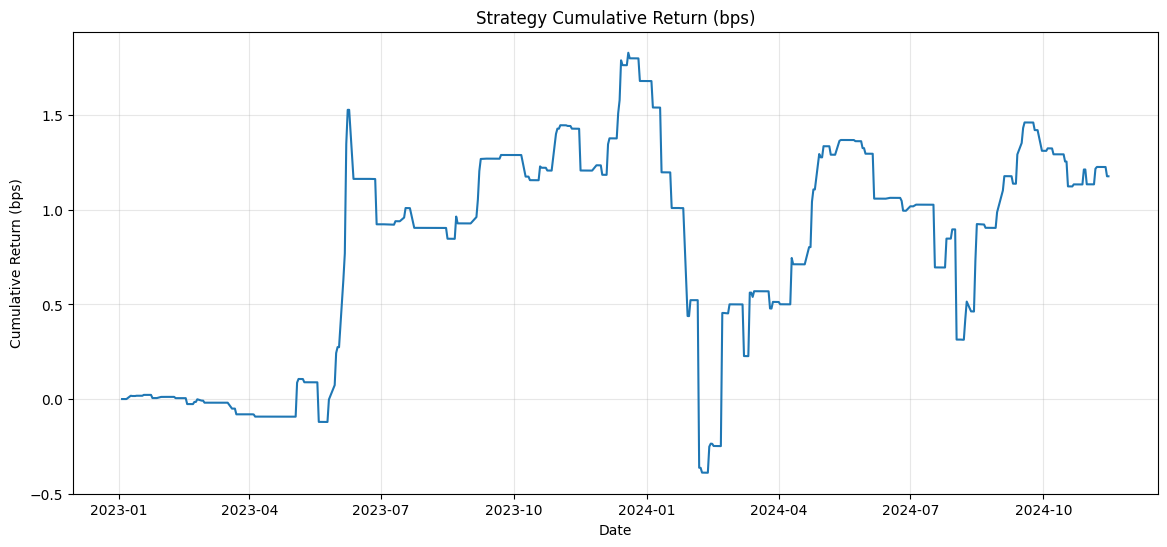

In [67]:
res_df = run_spread_reversion(trade_df)
print(res_df.tail(10))
plt.figure(figsize = (14, 6))
plt.plot(res_df['cum_roc (bps)'])
plt.xlabel('Date')
plt.ylabel('Cumulative Return (bps)')
plt.title('Strategy Cumulative Return (bps)')
plt.grid(alpha = 0.3)
plt.show()

### Selecting the best parameters


To find the best parameters, I'll try a bunch of different combinations of the parameters, and see which one has the best performance.

In [59]:
M_lst = [1, 2, 3, 5, 10, 20]
s_lst = [0.005, 0.01, 0.025, 0.05, 0.1]
g_lst = [0.002, 0.003, 0.004, 0.005, 0.007, 0.009, 0.012]
j_lst = [0.001, 0.002, 0.003, 0.005]
zeta_lst = [0.00001, 0]
gj_lst = list(product(g_lst, j_lst))
gj_lst = [(g, j) for g, j in gj_lst if g > j]

perf = []
comb_params = list(product(M_lst, s_lst, gj_lst, zeta_lst))
for M, s, gj, zeta in comb_params:
    res_df = run_spread_reversion(trade_df, M = M, s = s, g = gj[0], j = gj[1], zeta = zeta)
    rtn = res_df['cum_roc (bps)'] / 10000
    annualized_rtn = rtn.iloc[-1] / len(rtn) * 252
    annualized_vol = rtn.diff().std() * np.sqrt(252)
    sharpe = annualized_rtn / annualized_vol
    perf.append({
        'M': M,
        's': s,
        'g': gj[0],
        'j': gj[1],
        'zeta': zeta,
        'annualized_rtn (bps)': annualized_rtn * 10000,
        'annualized_vol': annualized_vol,
        'sharpe': sharpe,
    })
perf_df = pd.DataFrame(perf)
perf_df = perf_df.sort_values('sharpe', ascending = False).reset_index(drop = True)
display(perf_df.head(10))

,M,s,g,j,zeta,annualized_rtn (bps),annualized_vol,sharpe
0,1,0.005,0.002,0.001,0.00000,0.096162,0.000009,1.045876
1,1,0.005,0.002,0.001,0.00001,0.094138,0.000009,1.025874
2,2,0.005,0.012,0.003,0.00000,0.457933,0.000053,0.870915
3,2,0.005,0.012,0.003,0.00001,0.449819,0.000052,0.857947
4,20,0.005,0.002,0.001,0.00000,0.076516,0.000009,0.842217
5,20,0.005,0.002,0.001,0.00001,0.075877,0.000009,0.836107
6,20,0.005,0.007,0.001,0.00000,0.074105,0.000009,0.828214
7,20,0.005,0.004,0.001,0.00000,0.074544,0.000009,0.824530
8,20,0.005,0.005,0.001,0.00000,0.074544,0.000009,0.824530
9,20,0.005,0.003,0.001,0.00000,0.074544,0.000009,0.824530


- Best parameters are the ones shown in the top row, with the highest sharpe ratio and annualized return.

            position_side  position_x  position_y  open_pnl      cum_pnl  \
date                                                                       
2024-11-04              1        -186          68       0.0  1771.155159   
2024-11-05              1        -186          68       0.0  1771.155159   
2024-11-06              1        -186          68       0.0  1771.155159   
2024-11-07              1        -186          68       0.0  1771.155159   
2024-11-08              1        -186          68       0.0  1771.155159   
2024-11-11              1        -186          68       0.0  1771.155159   
2024-11-12              1        -186          68       0.0  1771.155159   
2024-11-13              1        -186          68       0.0  1771.155159   
2024-11-14              1        -186          68       0.0  1771.155159   
2024-11-15              1        -186          68       0.0  1771.155159   

            cum_roc (bps)  stop_loss  
date                                  
2024-11-0

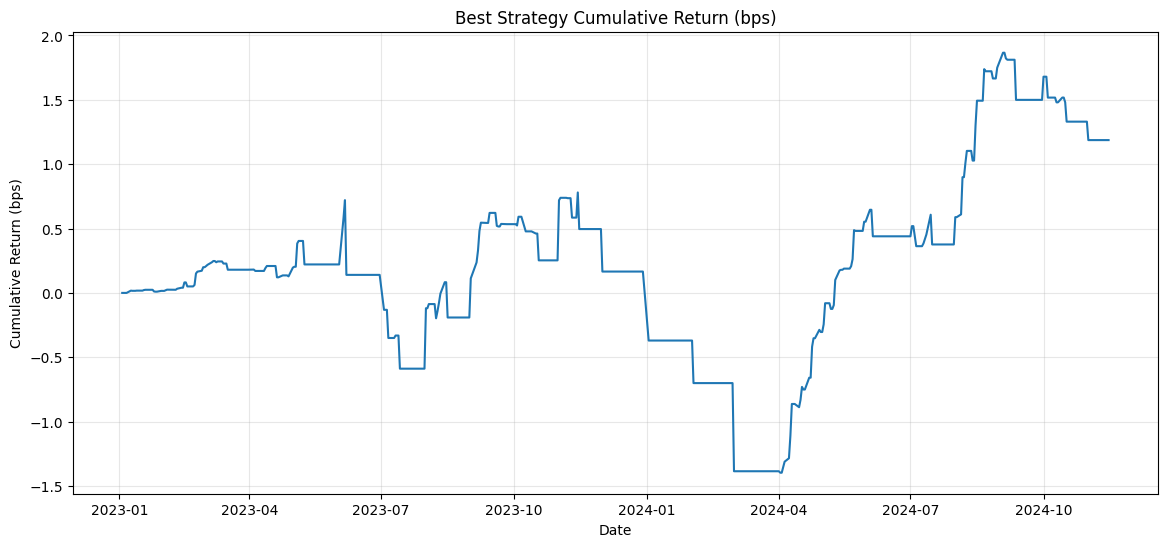

In [69]:
# plot the best strategy
best_params = perf_df.iloc[0]
M, s, g, j, zeta = best_params['M'], best_params['s'], best_params['g'], best_params['j'], best_params['zeta']
res_df = run_spread_reversion(trade_df, M = int(M), s = s, g = g, j = j, zeta = zeta)
print(res_df.tail(10))
plt.figure(figsize = (14, 6))
plt.plot(res_df['cum_roc (bps)'])
plt.xlabel('Date')
plt.ylabel('Cumulative Return (bps)')
plt.title('Best Strategy Cumulative Return (bps)')
plt.grid(alpha = 0.3)
plt.show()